In [4]:
import matplotlib.pyplot as plt
import networkx as nx

edges: 3
nodes: 4
{3: {'label': 'center', 'weight': 2}, 4: {}, 1: {}, 2: {}}


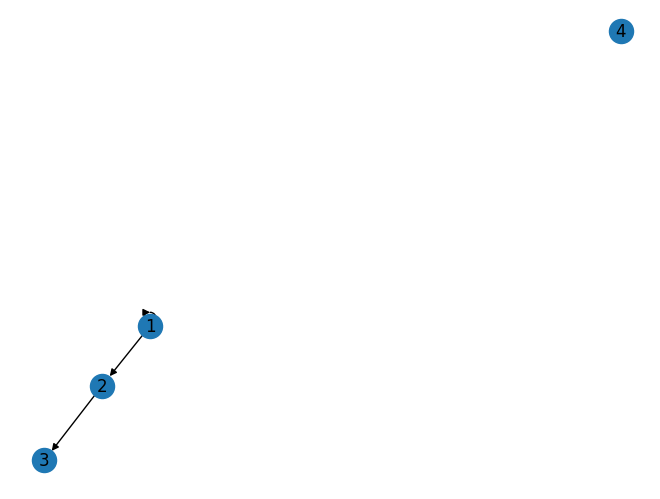

In [23]:
g = nx.DiGraph()
g.add_node(3, label="center", weight=2)
g.add_node(4)
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(1, 1)
nx.draw(g, with_labels=True)

print(f"edges: {g.number_of_edges()}")
print(f"nodes: {g.number_of_nodes()}")
print(dict(g.nodes))

In [43]:
# グラフの作成
G = nx.Graph()

# ノードの追加
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')

# 重み付きエッジの追加
G.add_edge('A', 'B', weight=0.6)
G.add_edge('B', 'C', weight=0.2)
G.add_edge('C', 'D', weight=0.1)
G.add_edge('D', 'A', weight=0.5)

# 重み付きエッジの取得
edge_weight = G['A']['B']['weight']
print(f"Edge weight between A and B: {edge_weight}")

# すべてのエッジと重みを表示
for edge in G.edges(data=True):
    print(edge)

# nx.draw(G, with_labels=True)

Edge weight between A and B: 0.6
('A', 'B', {'weight': 0.6})
('A', 'D', {'weight': 0.5})
('B', 'C', {'weight': 0.2})
('C', 'D', {'weight': 0.1})


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

# データの読み込み
# data = pd.read_csv('transactions.csv')

# サンプルデータ
data = pd.DataFrame({
    'Customer_ID': [1, 1, 2, 2, 3, 3, 1],
    'Transaction_Date': pd.to_datetime(['2023-01-01', '2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-03', '2023-01-03']),
    'Transaction_Amount': [50.0, 20.0, 150.0, 200.0, 100.0, 30.0, 40.0]
})


In [18]:
print(data.shape)
data

(7, 3)


,Customer_ID,Transaction_Date,Transaction_Amount
0,1,2023-01-01,50.0
1,1,2023-01-01,20.0
2,2,2023-01-01,150.0
3,2,2023-01-02,200.0
4,3,2023-01-02,100.0
5,3,2023-01-03,30.0
6,1,2023-01-03,40.0


In [13]:
# 特徴量の計算
daily_transactions = data.groupby(['Customer_ID', 'Transaction_Date']).agg(
    {'Transaction_Amount': ['count', 'mean']}
).reset_index()

# 列名の変更
daily_transactions.columns = ['Customer_ID', 'Transaction_Date', 'Transactions_Per_Day', 'Avg_Transaction_Amount']

In [17]:
print(daily_transactions.shape)
daily_transactions

(6, 4)


,Customer_ID,Transaction_Date,Transactions_Per_Day,Avg_Transaction_Amount
0,1,2023-01-01,2,35.0
1,1,2023-01-03,1,40.0
2,2,2023-01-01,1,150.0
3,2,2023-01-02,1,200.0
4,3,2023-01-02,1,100.0
5,3,2023-01-03,1,30.0


In [19]:
# 特徴量の正規化
scaler = StandardScaler()
daily_transactions[['Transactions_Per_Day', 'Avg_Transaction_Amount']] = scaler.fit_transform(
    daily_transactions[['Transactions_Per_Day', 'Avg_Transaction_Amount']]
)

In [20]:
daily_transactions

,Customer_ID,Transaction_Date,Transactions_Per_Day,Avg_Transaction_Amount
0,1,2023-01-01,2.236068,-0.892797
1,1,2023-01-03,-0.447214,-0.815163
2,2,2023-01-01,-0.447214,0.892797
3,2,2023-01-02,-0.447214,1.669143
4,3,2023-01-02,-0.447214,0.116452
5,3,2023-01-03,-0.447214,-0.970432


In [25]:
# LOFアルゴリズムの適用
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
outlier_scores = lof.fit_predict(daily_transactions[['Transactions_Per_Day', 'Avg_Transaction_Amount']]) # 1日あたりの取引数と平均取引金額を特徴量として使用

# 結果のマージ
daily_transactions['Outlier'] = outlier_scores
daily_transactions['Outlier'] = daily_transactions['Outlier'].apply(lambda x: x == -1)

daily_transactions

,Customer_ID,Transaction_Date,Transactions_Per_Day,Avg_Transaction_Amount,Outlier
0,1,2023-01-01,2.236068,-0.892797,False
1,1,2023-01-03,-0.447214,-0.815163,False
2,2,2023-01-01,-0.447214,0.892797,False
3,2,2023-01-02,-0.447214,1.669143,False
4,3,2023-01-02,-0.447214,0.116452,False
5,3,2023-01-03,-0.447214,-0.970432,False


In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

# データの読み込み
# data = pd.read_csv('transactions.csv')

# サンプルデータ
data = pd.DataFrame({
    'Customer_ID': [1, 1, 2, 2, 3, 3, 1],
    'Transaction_Date': pd.to_datetime(['2023-01-01', '2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-03', '2023-01-03']),
    'Transaction_Amount': [50.0, 20.0, 150.0, 200.0, 100.0, 30.0, 40.0]
})

# 特徴量の計算
daily_transactions = data.groupby(['Customer_ID', 'Transaction_Date']).agg(
    {'Transaction_Amount': 'sum'}
).reset_index()

weekly_transactions = daily_transactions.copy()
weekly_transactions['Transaction_Week'] = weekly_transactions['Transaction_Date'].dt.to_period('W')
weekly_transactions = weekly_transactions.groupby(['Customer_ID', 'Transaction_Week']).agg(
    {'Transaction_Amount': 'sum'}
).reset_index()

# 列名の変更
daily_transactions.columns = ['Customer_ID', 'Transaction_Date', 'Daily_Transaction_Amount']
weekly_transactions.columns = ['Customer_ID', 'Transaction_Week', 'Weekly_Transaction_Amount']

# 特徴量の正規化
scaler_daily = StandardScaler()
daily_transactions['Daily_Transaction_Amount'] = scaler_daily.fit_transform(
    daily_transactions[['Daily_Transaction_Amount']]
)

scaler_weekly = StandardScaler()
weekly_transactions['Weekly_Transaction_Amount'] = scaler_weekly.fit_transform(
    weekly_transactions[['Weekly_Transaction_Amount']]
)

# LOFアルゴリズムの適用（1日あたりの取引額）
lof_daily = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
outlier_scores_daily = lof_daily.fit_predict(daily_transactions[['Daily_Transaction_Amount']])

# LOFアルゴリズムの適用（1週間あたりの取引額）
lof_weekly = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
outlier_scores_weekly = lof_weekly.fit_predict(weekly_transactions[['Weekly_Transaction_Amount']])

# 結果のマージ
daily_transactions['Outlier_Daily'] = outlier_scores_daily
daily_transactions['Outlier_Daily'] = daily_transactions['Outlier_Daily'].apply(lambda x: x == -1)

weekly_transactions['Outlier_Weekly'] = outlier_scores_weekly
weekly_transactions['Outlier_Weekly'] = weekly_transactions['Outlier_Weekly'].apply(lambda x: x == -1)

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

# サンプルデータ
data = pd.DataFrame({
    'Customer_ID': [1, 1, 2, 2, 3, 3, 1],
    'Transaction_Date': pd.to_datetime(['2023-01-01', '2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-03', '2023-01-03']),
    'Transaction_Amount': [50.0, 20.0, 150.0, 200.0, 100.0, 30.0, 40.0]
})

# 特徴量の計算
weekly_transactions = data.groupby(['Customer_ID', 'Transaction_Date']).agg(
    {'Transaction_Amount': 'sum'}
).reset_index()
weekly_transactions['Transaction_Week'] = weekly_transactions['Transaction_Date'].dt.to_period('W')
weekly_transactions = weekly_transactions.groupby(['Customer_ID', 'Transaction_Week']).agg(
    {'Transaction_Amount': 'sum'}
).reset_index()

# 列名の変更
weekly_transactions.columns = ['Customer_ID', 'Transaction_Week', 'Weekly_Transaction_Amount']

scaler_weekly = StandardScaler()
weekly_transactions['Weekly_Transaction_Amount'] = scaler_weekly.fit_transform(
    weekly_transactions[['Weekly_Transaction_Amount']]
)

# LOFアルゴリズムの適用（1週間あたりの取引額）
lof_weekly = LocalOutlierFactor(n_neighbors=5, contamination=0.1, novelty=True)
lof_weekly.fit(weekly_transactions[['Weekly_Transaction_Amount']])

# weekly_transactions['Outlier_Weekly'] = outlier_scores_weekly
# weekly_transactions['Outlier_Weekly'] = weekly_transactions['Outlier_Weekly'].apply(lambda x: x == -1)

LocalOutlierFactor(contamination=0.1, n_neighbors=5, novelty=True)

In [51]:
weekly_transactions

,Customer_ID,Transaction_Week,Weekly_Transaction_Amount
0,1,2022-12-26/2023-01-01,-0.841200
1,1,2023-01-02/2023-01-08,-1.366949
2,2,2022-12-26/2023-01-01,0.560800
3,2,2023-01-02/2023-01-08,1.437049
4,3,2023-01-02/2023-01-08,0.210300


In [50]:
lof_weekly.predict(weekly_transactions[['Weekly_Transaction_Amount']])

/Users/shuomura/workspace/math/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1])

In [52]:
import os

print(os.cpu_count())

8


In [39]:
daily_transactions

,Customer_ID,Transaction_Date,Daily_Transaction_Amount,Outlier_Daily
0,1,2023-01-01,-0.469155,False
1,1,2023-01-03,-0.965908,False
2,2,2023-01-01,0.855518,False
3,2,2023-01-02,1.683439,False
4,3,2023-01-02,0.027597,True
5,3,2023-01-03,-1.131492,False


In [33]:
weekly_transactions

,Customer_ID,Transaction_Week,Weekly_Transaction_Amount,Outlier_Weekly
0,1,2022-12-26/2023-01-01,-0.841200,False
1,1,2023-01-02/2023-01-08,-1.366949,False
2,2,2022-12-26/2023-01-01,0.560800,False
3,2,2023-01-02/2023-01-08,1.437049,False
4,3,2023-01-02/2023-01-08,0.210300,True
